#### According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

#### This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

Attribute Information

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv(r"D:\End2EndProjects\Stroke-Prediction-End2End\dataset\healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data.shape


(5110, 12)

Since 201 is a meagre value compared to 5110. So we can even drop those

In [6]:
#Filling null values
data["bmi"].value_counts()

28.7    41
28.4    38
26.7    37
27.6    37
26.1    37
        ..
48.7     1
49.2     1
51.0     1
49.4     1
14.9     1
Name: bmi, Length: 418, dtype: int64

In [7]:
data["bmi"].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

In [8]:
data["bmi"] = data["bmi"].fillna(data["bmi"].mean())#or add inplace= true

In [9]:
data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#Feature Selection
data.drop('id',axis = 1,inplace = True)


In [11]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


<AxesSubplot: >

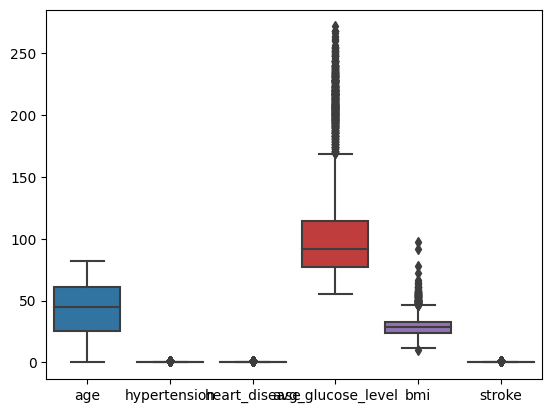

In [12]:
#Outlier Removal
sns.boxplot(data)

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 5000x3000 with 0 Axes>

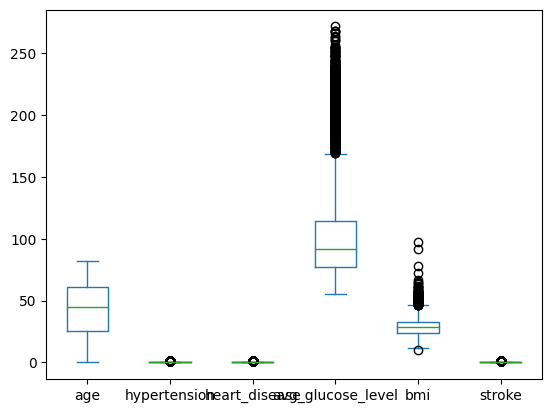

In [13]:
#plt.rcParams['figure.figsize'] = (10,10)
plt.figure(figsize=(50,30))
data.plot(kind='box')
plt.show

These are not outliers as these outliers are the main causes for stroke

In [14]:
data["avg_glucose_level"].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

### Label Encoding

In [15]:
data["work_type"].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [17]:
data["Residence_type"] = le.fit_transform(data["Residence_type"])
data["work_type"] = le.fit_transform(data["work_type"])
data["smoking_status"] = le.fit_transform(data["smoking_status"])
data["ever_married"] = le.fit_transform(data["ever_married"])
data["gender"] = le.fit_transform(data["gender"])


gender = le.fit_transform(data["gender"])

data["gender"] = gender

Residence_type = le.fit_transform(data["Residence_type"])

data["Residence_type"] = Residence_type

work_type = le.fit_transform(data["work_type"]) Similarly assign

smoking_status = le.fit_transform(data["smoking_status"])

ever_married = le.fit_transform(data["ever_married"])

In [18]:
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


### Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x = data.drop("stroke",axis=1)
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.600000,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2
3,0,49.0,0,0,1,2,1,171.23,34.400000,3
4,0,79.0,1,0,1,3,0,174.12,24.000000,2
...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1


In [21]:
y = data["stroke"]
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Normalisation

In [23]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [24]:
x_train_std = std.fit_transform(x_train)
x_train_std

array([[ 1.19299477,  1.58415472, -0.32198091, ...,  0.13559307,
        -0.05801609, -0.35272473],
       [-0.83822664,  0.82970766, -0.32198091, ..., -0.39745713,
         0.94746229, -1.28541469],
       [-0.83822664, -0.98984115, -0.32198091, ..., -1.02870079,
         0.61230283,  0.57996524],
       ...,
       [-0.83822664, -1.87032526, -0.32198091, ..., -0.20107021,
        -1.43732618, -1.28541469],
       [ 1.19299477,  1.62853396, -0.32198091, ...,  1.96444623,
         0.26425262, -0.35272473],
       [-0.83822664,  0.11963983, -0.32198091, ..., -0.13816503,
         2.75216707,  1.5126552 ]])

In [25]:
x_test_std = std.transform(x_test)
x_test_std

array([[ 1.19299477e+00, -5.46048760e-01, -3.21980910e-01, ...,
        -9.11876874e-01, -7.67007258e-01, -1.28541469e+00],
       [ 1.19299477e+00, -1.46635607e-01, -3.21980910e-01, ...,
        -9.02232874e-01, -8.37975893e-02,  5.79965236e-01],
       [-8.38226644e-01, -1.56677126e+00, -3.21980910e-01, ...,
        -7.02119867e-01, -8.31461000e-01, -1.28541469e+00],
       ...,
       [ 1.19299477e+00,  2.52777546e-01,  3.10577419e+00, ...,
         2.81568169e-01,  1.86908128e-01, -3.52724726e-01],
       [-8.38226644e-01,  5.63432221e-01, -3.21980910e-01, ...,
         4.86064813e-01, -5.22083037e-01,  1.51265520e+00],
       [ 1.19299477e+00,  1.53977548e+00,  3.10577419e+00, ...,
        -9.57204781e-04, -2.12705074e-01,  5.79965236e-01]])

In [26]:
x_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
802,1,79.00,0,0,1,3,0,112.64,28.5,1
3927,0,62.00,0,0,1,2,1,88.32,36.3,0
2337,0,21.00,0,0,0,2,0,59.52,33.7,2
3910,1,31.00,0,0,1,0,1,65.70,30.4,1
1886,0,31.00,0,0,0,2,0,59.63,19.9,2
...,...,...,...,...,...,...,...,...,...,...
4426,1,43.00,0,0,1,0,0,88.00,30.6,2
466,0,61.00,1,0,1,2,0,170.05,60.2,3
3092,0,1.16,0,0,0,4,1,97.28,17.8,0
3772,1,80.00,0,0,1,3,0,196.08,31.0,1


### Training

#### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [28]:
dt.fit(x_train_std,y_train)

DecisionTreeClassifier()

In [29]:
dt.feature_importances_

array([0.01109824, 0.19857115, 0.02518965, 0.01960306, 0.01056525,
       0.04738747, 0.04037246, 0.29348345, 0.2803753 , 0.07335397])

In [30]:
x_train.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status'],
      dtype='object')

age, avg glucose level and bmi are the important features according to decision tree.

In [31]:
y_pred = dt.predict(x_test_std)

In [32]:
y_test

4688    0
4478    0
3849    0
4355    0
3826    0
       ..
3605    0
4934    0
4835    0
4105    0
2902    0
Name: stroke, Length: 1022, dtype: int64

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
dt_ac = accuracy_score(y_test,y_pred)
dt_ac

0.9197651663405088

#### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
lr.fit(x_train_std,y_train)

LogisticRegression()

In [37]:
y_pred_lr = lr.predict(x_test_std)
y_pred_lr

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [38]:
ac_lr = accuracy_score(y_test,y_pred)
ac_lr

0.9197651663405088

#### KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()#default n = 5

In [40]:
knn.fit(x_train_std,y_train)

KNeighborsClassifier()

In [41]:
y_pred = knn.predict(x_test_std)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [42]:
ac_knn = accuracy_score(y_test,y_pred)
ac_knn

0.9393346379647749

#### Random Forest

No need to apply _std in dt and rf.but that doesn't make much difference

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [44]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [45]:
y_pred = rf.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
ac_rf = accuracy_score(y_test,y_pred)
ac_rf

0.9393346379647749

#### SVM

In [47]:
from sklearn.svm import SVC

In [48]:
sv = SVC()

In [49]:
sv.fit(x_train_std,y_train)

SVC()

In [50]:
y_pred = sv.predict(x_test_std)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
ac_sv = accuracy_score(y_test,y_pred)
ac_sv

0.9393346379647749

In [52]:
ac_lr

0.9197651663405088

In [53]:
ac_rf

0.9393346379647749

In [54]:
ac_knn

0.9393346379647749

In [55]:
dt_ac

0.9197651663405088

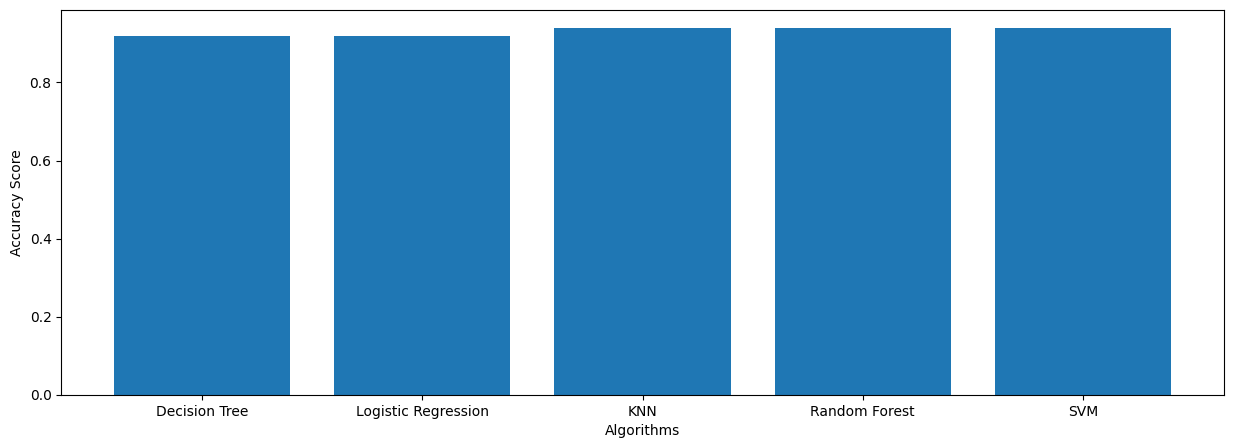

In [56]:
plt.figure(figsize=(15,5))
plt.bar(["Decision Tree", "Logistic Regression", "KNN", 'Random Forest', "SVM"], [dt_ac,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")
plt.show()

In [57]:
import pickle
filename = r"D:\End2EndProjects\Stroke-Prediction-End2End\logistic_model.sav"
pickle.dump(lr,open(filename,'wb'))